# Australian Fire Data visualisation

### Problem Statement: Density Plot on the Australia Fire dataset.

#### Key points to cover:

#### • Using the matplotlib defaults

#### • Adjusting alpha and marker size to compensate for overplotting

#### • Subsampling the dataset.

#### • Using a hexbin plot.

In [ ]:
import sys
import numpy as np 
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Software details for the running machine and versions

In [ ]:
print('Python Version: {}'.format(sys.version))
print('Numpy Version: {}'.format(np.__version__))
print('Pandas Version: {}'.format(pd.__version__))

Python Version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Numpy Version: 1.21.5
Pandas Version: 1.4.3


### Import Data into Pandas DataFrame

In [ ]:
AusFireDataSet = pd.read_csv('../DataSets/fire_nrt_V1_96617.csv')

### Data Description
- Total Records = 956257
- Total number of Features = 14
- Data Types:
    - Integer - 1
    - Float - 7
    - Object - 6

In [ ]:
AusFireDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    956257 non-null  float64
 1   longitude   956257 non-null  float64
 2   bright_ti4  956257 non-null  float64
 3   scan        956257 non-null  float64
 4   track       956257 non-null  float64
 5   acq_date    956257 non-null  object 
 6   acq_time    956257 non-null  int64  
 7   satellite   956257 non-null  object 
 8   instrument  956257 non-null  object 
 9   confidence  956257 non-null  object 
 10  version     956257 non-null  object 
 11  bright_ti5  956257 non-null  float64
 12  frp         956257 non-null  float64
 13  daynight    956257 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


In [ ]:
AusFireDataSet.shape

(956257, 14)

### Checking the Head (top 10 entries ) and Tail (bottom 10 entries) for the datset

In [ ]:
AusFireDataSet.head(10)

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0 -42.69706  147.70634       333.6  0.57   0.43  2019-10-01       336   
1 -42.26889  147.31104       336.2  0.39   0.44  2019-10-01       336   
2 -40.85202  145.38068       327.9  0.46   0.47  2019-10-01       336   
3 -42.39329  147.47144       346.9  0.38   0.43  2019-10-01       336   
4 -42.69701  147.70584       334.1  0.56   0.43  2019-10-01       336   
5 -42.77161  146.86771       353.9  0.41   0.45  2019-10-01       336   
6 -41.48875  146.64394       338.7  0.41   0.45  2019-10-01       336   
7 -41.48920  146.63898       337.1  0.41   0.45  2019-10-01       336   
8 -41.01627  147.10405       327.1  0.38   0.43  2019-10-01       336   
9 -41.01717  147.09473       332.8  0.38   0.44  2019-10-01       336   

  satellite instrument confidence version  bright_ti5  frp daynight  
0         N      VIIRS          n  1.0NRT       293.4  4.0        D  
1         N      VIIRS          n  1.0NRT       296.9  3.9        D  
2         N      VIIRS          n  1.0NRT       295.3  3.7        D  
3         N      VIIRS          n  1.0NRT       294.2  6.2        D  
4         N      VIIRS          n  1.0NRT       293.5  4.1        D  
5         N      VIIRS          n  1.0NRT       294.2  9.9        D  
6         N      VIIRS          n  1.0NRT       294.0  4.8        D  
7         N      VIIRS          n  1.0NRT       293.0  4.8        D  
8         N      VIIRS          n  1.0NRT       289.0  3.7        D  
9         N      VIIRS          n  1.0NRT       288.2  2.0        D

In [ ]:
AusFireDataSet.tail(10)

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
956247 -31.61366  119.73290       308.0  0.54   0.51  2020-01-11      1630   
956248 -33.25513  122.16520       307.1  0.56   0.43  2020-01-11      1630   
956249 -32.37196  121.47180       317.7  0.42   0.45  2020-01-11      1630   
956250 -32.66880  122.16485       299.9  0.39   0.44  2020-01-11      1630   
956251 -32.66712  122.15664       299.5  0.39   0.44  2020-01-11      1630   
956252 -32.66628  122.15253       306.9  0.39   0.44  2020-01-11      1630   
956253 -32.58616  123.39582       299.0  0.51   0.41  2020-01-11      1630   
956254 -33.37853  115.94735       309.7  0.40   0.60  2020-01-11      1630   
956255 -33.21827  115.75078       300.2  0.49   0.65  2020-01-11      1806   
956256 -33.22012  115.75043       300.3  0.49   0.65  2020-01-11      1806   

       satellite instrument confidence version  bright_ti5  frp daynight  
956247         N      VIIRS          n  1.0NRT       291.9  2.9        N  
956248         N      VIIRS          n  1.0NRT       289.1  1.3        N  
956249         N      VIIRS          n  1.0NRT       291.9  2.7        N  
956250         N      VIIRS          n  1.0NRT       288.5  0.6        N  
956251         N      VIIRS          n  1.0NRT       288.1  0.9        N  
956252         N      VIIRS          n  1.0NRT       288.6  0.8        N  
956253         N      VIIRS          n  1.0NRT       287.4  0.7        N  
956254         N      VIIRS          n  1.0NRT       291.7  1.0        N  
956255         N      VIIRS          n  1.0NRT       290.2  1.1        N  
956256         N      VIIRS          n  1.0NRT       290.0  0.6        N

### Check if any of the Data present in the Dataset is empty or is haveing missing values

In [ ]:
AusFireDataSet.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

## Feature Descriptions as per the dataset providers

- Latitude (latitude):
    - Center of nominal 375 m fire pixel
 <br></br>
- Longitude (longitude): 
    - Center of nominal 375 m fire pixel.
 <br></br>
- rightness temperature I-4 (Kelvin) (bright_ti4): 
    - VIIRS I-4 channel brightness temperature of the fire pixel measured in Kelvin.
 <br></br>
- Along Scan pixel size (Scan): 
    - The algorithm produces approximately 375 m pixels at nadir. Scan and track reflect actual pixel size.
 <br></br>
- Along Track pixel size (track): 
    - The algorithm produces approximately 375 m pixels at nadir. Scan and track reflect actual pixel size.
 <br></br>
- Acquisition Date (acq_date): 
     - Date of VIIRS acquisition.
 <br></br>
- Acquisition Time (acq_time): 
    - Time of acquisition/overpass of the satellite (in UTC).
 <br></br>
- Satellite (satellite): 
    - N= Suomi National Polar-orbiting Partnership (Suomi NPP).
 <br></br>
- Instrument (instrument): 
    - Constant value for VIIRS.
 <br></br>
- Confidence (confidence): 
    - This value is based on a collection of intermediate algorithm quantities used in the detection process. It is intended to help users gauge the quality of individual hotspot/fire pixels. Confidence values are set to low, nominal and high. Low confidence daytime fire pixels are typically associated with areas of sun glint and lower relative temperature anomaly (<15K) in the mid-infrared channel I4. Nominal confidence pixels are those free of potential sun glint contamination during the day and marked by strong (>15K) temperature anomaly in either day or nighttime data. High confidence fire pixels are associated with day or nighttime saturated pixels. Please note: Low confidence nighttime pixels occur only over the geographic area extending from 11deg E to 110 deg W and 7 deg N to 55 deg S. This area describes the region of influence of the South Atlantic Magnetic Anomaly which can cause spurious brightness temperatures in the mid-infrared channel I4 leading to potential false positive alarms. These have been removed from the NRT data distributed by FIRMS.
 <br></br>
- Version (Collection and source) (version): 
    - Version identifies the collection (e.g. VIIRS Collection 1) and source of data processing: Near Real-Time (NRT suffix added to collection) or Standard Processing (collection only). "1.0NRT" - Collection 1 NRT processing. "1.0" - Collection 1 Standard processing
 <br></br>
- Brightness temperature I-5 (bright_ti5): 
    - I-5 Channel brightness temperature of the fire pixel measured in Kelvin.
 <br></br>
- Fire Radiative Power (frp): 
    - FRP depicts the pixel-integrated fire radiative power in MW (megawatts). FRP depicts the pixel-integrated fire radiative power in MW (megawatts). Given the unique spatial and spectral resolution of the data, the VIIRS 375 m fire detection algorithm was customized and tuned in order to optimize its response over small fires while balancing the occurrence of false alarms. Frequent saturation of the mid-infrared I4 channel (3.55-3.93 µm) driving the detection of active fires requires additional tests and procedures to avoid pixel classification errors. As a result, sub-pixel fire characterization (e.g., fire radiative power [FRP] retrieval) is only viable across small and/or low-intensity fires. Systematic FRP retrievals are based on a hybrid approach combining 375 and 750 m data. In fact, starting in 2015 the algorithm incorporated additional VIIRS channel M13 (3.973-4.128 µm) 750 m data in both aggregated and unaggregated format.
 <br></br>
- Day or Night (daynight): 
    - D= Daytime fire, N= Nighttime fire
 <br></br>

### Printing the statistical properties of the numerical features from the dataset

In [ ]:
AusFireDataSet.describe(include = "all")

latitude      longitude     bright_ti4           scan  \
count   956257.000000  956257.000000  956257.000000  956257.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       -27.465569     142.191838     333.922148       0.460398   
std          8.008223      10.986038      21.988456       0.089811   
min        -43.212320     113.447010     208.000000       0.320000   
25%        -33.133860     132.291060     312.800000       0.390000   
50%        -30.489390     147.987880     336.700000       0.430000   
75%        -19.142220     150.751010     351.000000       0.510000   
max         -9.396500     153.452180     367.000000       0.800000   

                track    acq_date       acq_time satellite instrument  \
count   956257.000000      956257  956257.000000    956257     956257   
unique            NaN         103            NaN         1          1   
top               NaN  2020-01-04            NaN         N      VIIRS   
freq              NaN       35038            NaN    956257     956257   
mean         0.480464         NaN     986.334617       NaN        NaN   
std          0.118792         NaN     555.548115       NaN        NaN   
min          0.360000         NaN     224.000000       NaN        NaN   
25%          0.380000         NaN     418.000000       NaN        NaN   
50%          0.440000         NaN    1400.000000       NaN        NaN   
75%          0.570000         NaN    1512.000000       NaN        NaN   
max          0.780000         NaN    1824.000000       NaN        NaN   

       confidence version     bright_ti5            frp daynight  
count      956257  956257  956257.000000  956257.000000   956257  
unique          3       1            NaN            NaN        2  
top             n  1.0NRT            NaN            NaN        N  
freq       771035  956257            NaN            NaN   493586  
mean          NaN     NaN     299.311259      15.557809      NaN  
std           NaN     NaN      14.724600      45.584396      NaN  
min           NaN     NaN     150.000000       0.000000      NaN  
25%           NaN     NaN     289.500000       2.100000      NaN  
50%           NaN     NaN     295.600000       5.200000      NaN  
75%           NaN     NaN     307.600000      13.200000      NaN  
max           NaN     NaN     380.000000   10717.200000      NaN

### Plotting the distribution histogram for the 

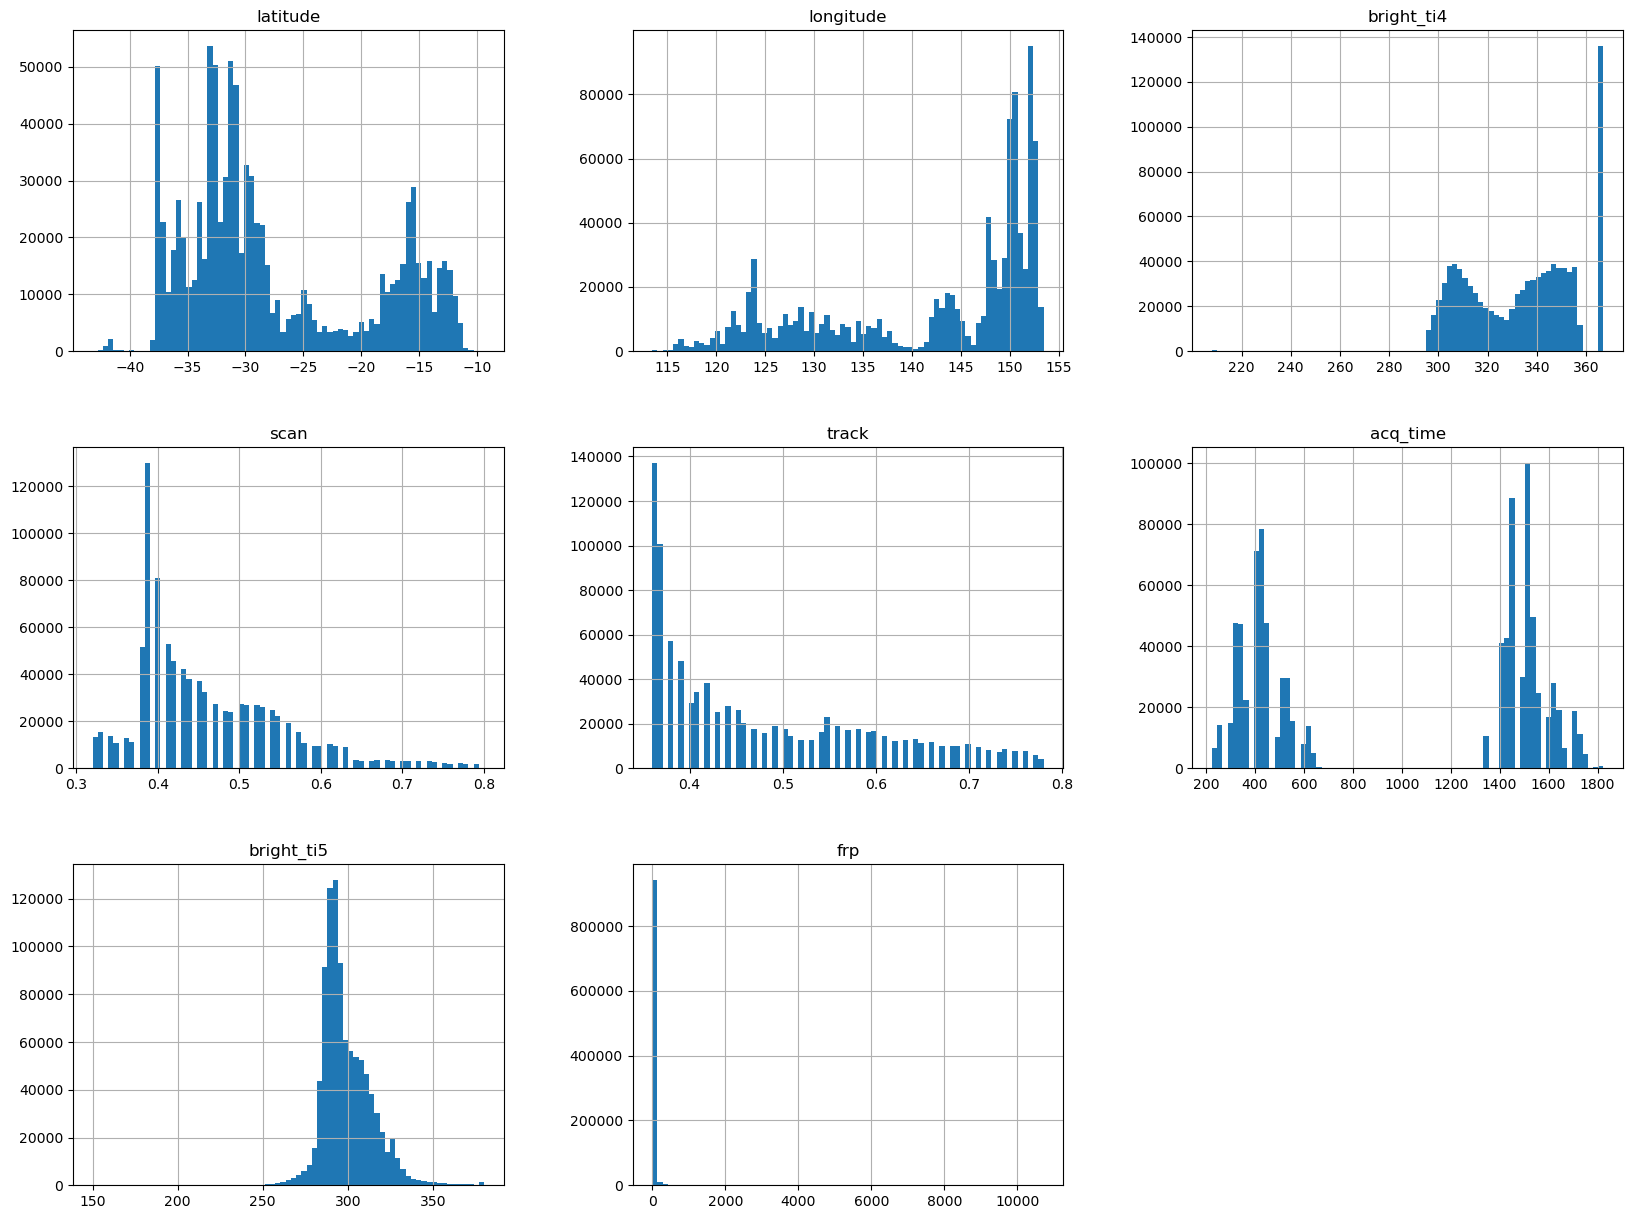

In [ ]:
AusFireDataSet.hist(bins=75, figsize=(20,15))
plt.show()

## Encoding Categorical values: DayNight as Day  = 1 Night = 0 and Confidence as 0, 1, 2 for low, nominal and high values

In [ ]:
daynight_encode = {"D": 1, "N": 0}
confidence_encode = {"l":0,"n":1,"h":2}

In [ ]:
AusFireDataSet['daynight'] = AusFireDataSet['daynight'].map(daynight_encode)
AusFireDataSet['confidence'] = AusFireDataSet['confidence'].map(confidence_encode)

In [ ]:
AusFireDataSet.describe(include = "all")

latitude      longitude     bright_ti4           scan  \
count   956257.000000  956257.000000  956257.000000  956257.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       -27.465569     142.191838     333.922148       0.460398   
std          8.008223      10.986038      21.988456       0.089811   
min        -43.212320     113.447010     208.000000       0.320000   
25%        -33.133860     132.291060     312.800000       0.390000   
50%        -30.489390     147.987880     336.700000       0.430000   
75%        -19.142220     150.751010     351.000000       0.510000   
max         -9.396500     153.452180     367.000000       0.800000   

                track    acq_date       acq_time satellite instrument  \
count   956257.000000      956257  956257.000000    956257     956257   
unique            NaN         103            NaN         1          1   
top               NaN  2020-01-04            NaN         N      VIIRS   
freq              NaN       35038            NaN    956257     956257   
mean         0.480464         NaN     986.334617       NaN        NaN   
std          0.118792         NaN     555.548115       NaN        NaN   
min          0.360000         NaN     224.000000       NaN        NaN   
25%          0.380000         NaN     418.000000       NaN        NaN   
50%          0.440000         NaN    1400.000000       NaN        NaN   
75%          0.570000         NaN    1512.000000       NaN        NaN   
max          0.780000         NaN    1824.000000       NaN        NaN   

           confidence version     bright_ti5            frp       daynight  
count   956257.000000  956257  956257.000000  956257.000000  956257.000000  
unique            NaN       1            NaN            NaN            NaN  
top               NaN  1.0NRT            NaN            NaN            NaN  
freq              NaN  956257            NaN            NaN            NaN  
mean         1.033037     NaN     299.311259      15.557809       0.483835  
std          0.438866     NaN      14.724600      45.584396       0.499739  
min          0.000000     NaN     150.000000       0.000000       0.000000  
25%          1.000000     NaN     289.500000       2.100000       0.000000  
50%          1.000000     NaN     295.600000       5.200000       0.000000  
75%          1.000000     NaN     307.600000      13.200000       1.000000  
max          2.000000     NaN     380.000000   10717.200000       1.000000

### Plotting the Corelation matrix to isolate the useful features and use them for visualization

<AxesSubplot:>

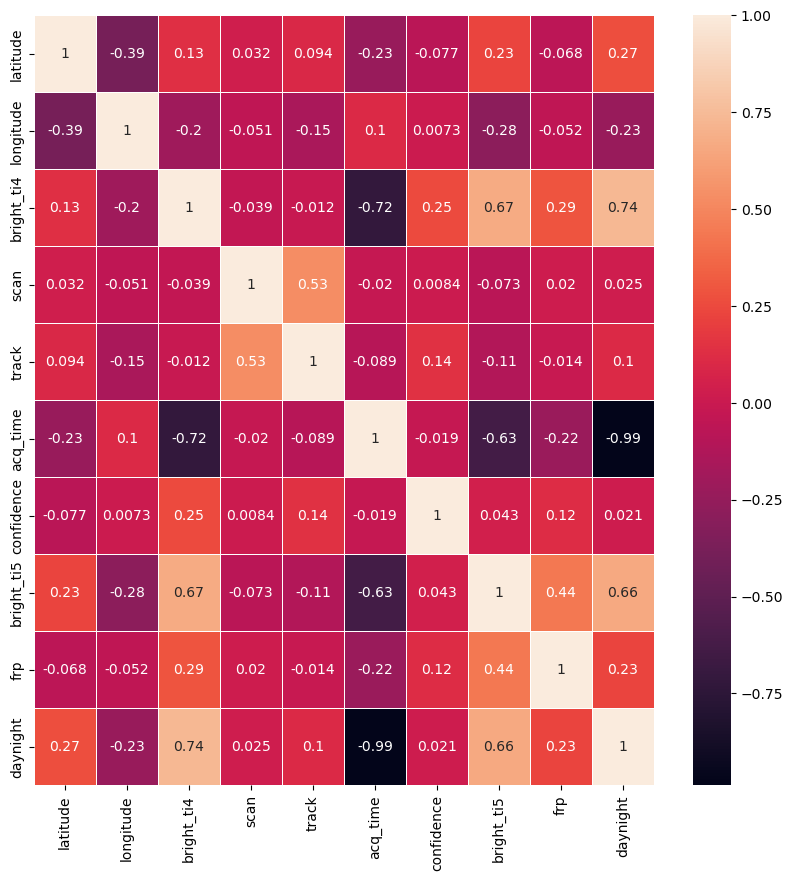

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(AusFireDataSet.corr(),annot=True,linewidths=.5)

### In our data we need to find all the features with many Unique values for the ones that are only single valued we can drop them

### Just by looking at the CSV/head or tail functions of the data frame we can see that instrument, Satellite and version features are not adding anything meaningful to the feature setup therefore we drop them 

### Additionally dropping acq_time as it is indirectly indiacated by the DayNight feature as well

In [ ]:
AusFireDataSet.drop(['satellite', 'instrument', 'version', 'acq_time','acq_date'], axis =1, inplace=True)

In [ ]:
AusFireDataSet.head()

latitude  longitude  bright_ti4  scan  track  confidence  bright_ti5  frp  \
0 -42.69706  147.70634       333.6  0.57   0.43           1       293.4  4.0   
1 -42.26889  147.31104       336.2  0.39   0.44           1       296.9  3.9   
2 -40.85202  145.38068       327.9  0.46   0.47           1       295.3  3.7   
3 -42.39329  147.47144       346.9  0.38   0.43           1       294.2  6.2   
4 -42.69701  147.70584       334.1  0.56   0.43           1       293.5  4.1   

   daynight  
0         1  
1         1  
2         1  
3         1  
4         1

### Replotting the updated correlation matrix

<AxesSubplot:>

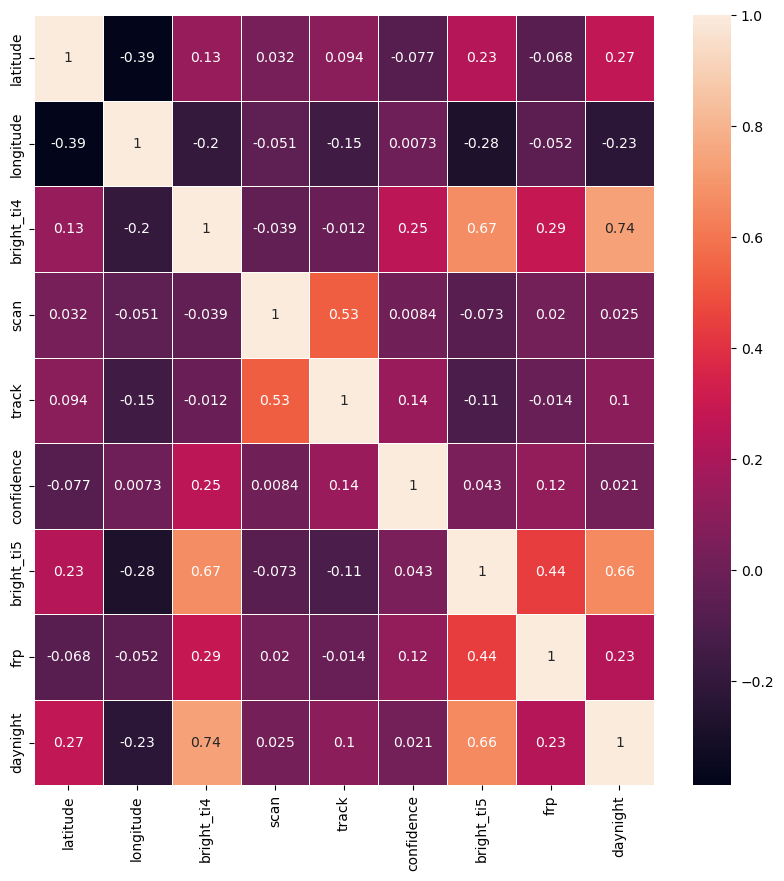

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(AusFireDataSet.corr(),annot=True,linewidths=.5)

### From the above matrix we can see that the confidence feature for a fire being detected is significantly related to the feature of bright_ti4 hence using that as the basis for plot 

### Now We will plot the feature bright_ti4 wrt Longitude and Latitude as axes for the graph and try to figuire out which visualization provides good representation for the dataframe

### First parameter we will experiment with during ploting is marker size (s)

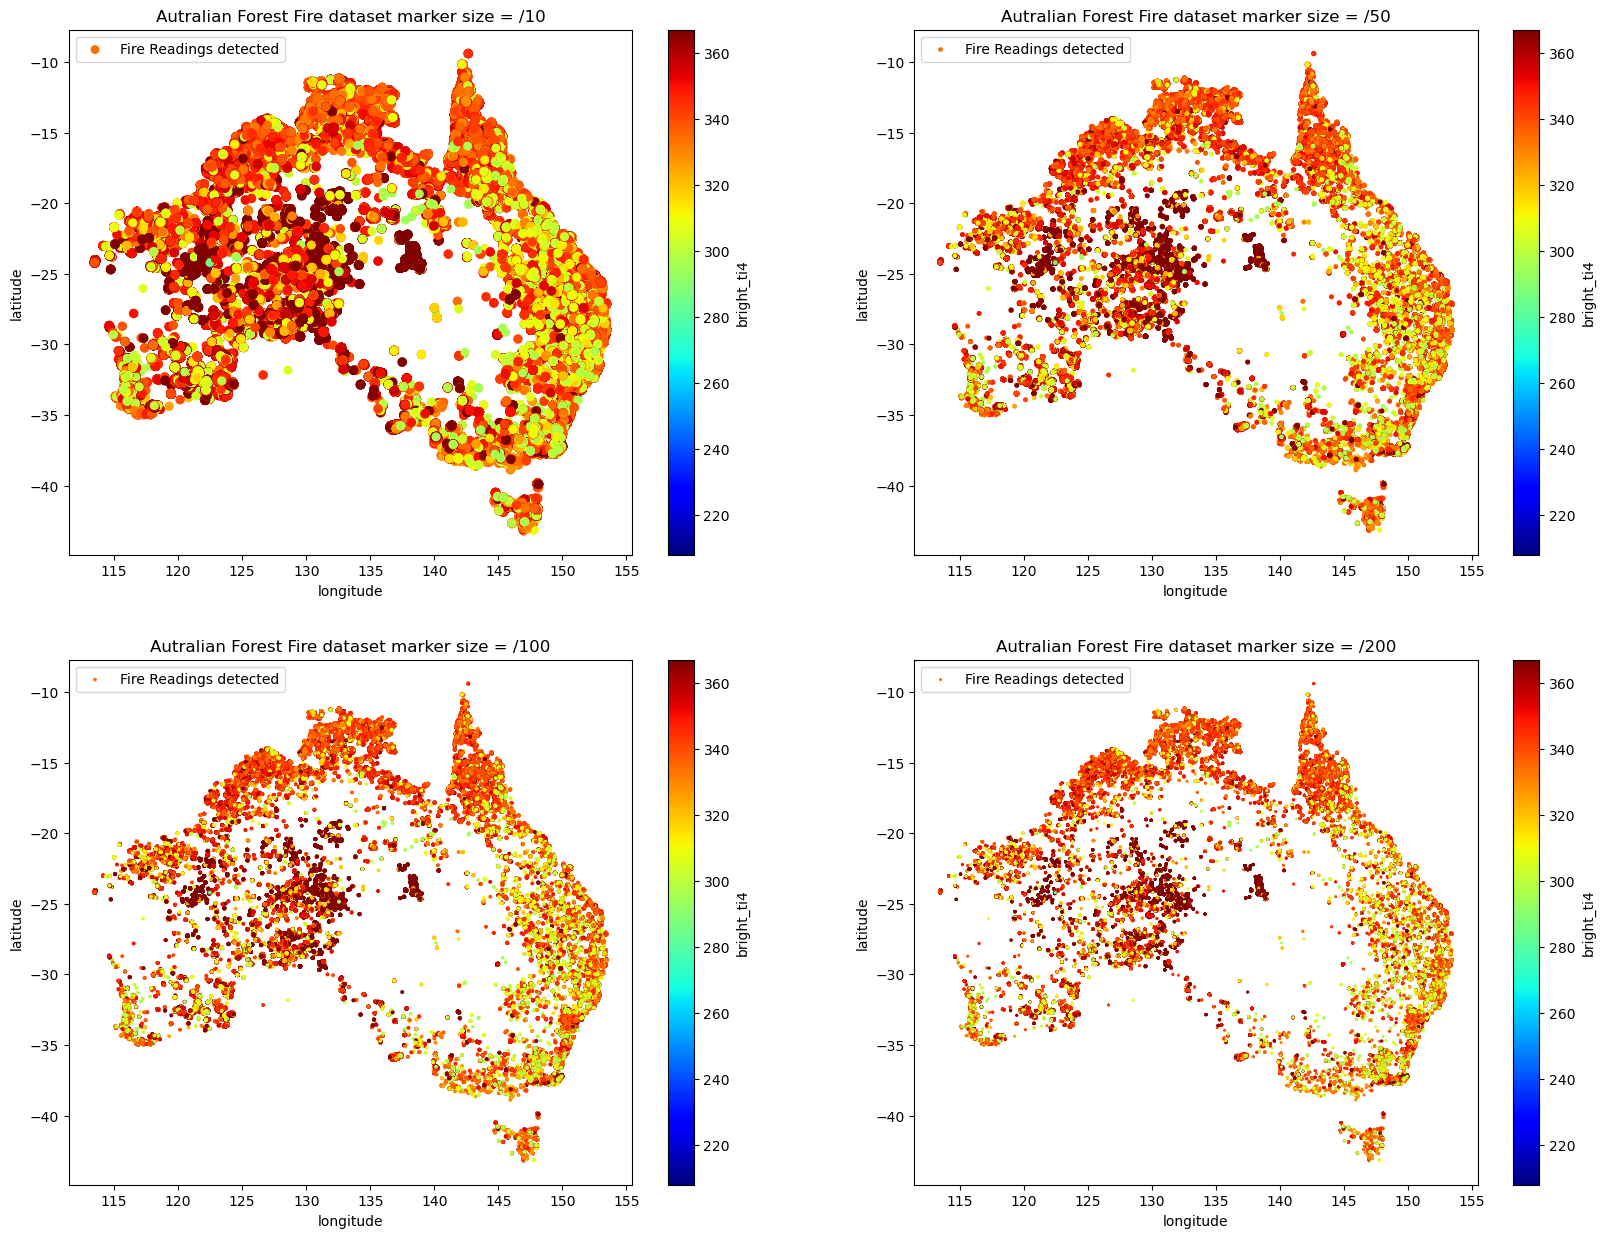

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(20,15))

AusFireDataSet.plot(ax = ax[0,0],kind="scatter", x="longitude", y="latitude", alpha= 1,
                    s = AusFireDataSet['bright_ti4']/10, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,0].set_title('Autralian Forest Fire dataset marker size = /10')
AusFireDataSet.plot(ax = ax[0,1],kind="scatter", x="longitude", y="latitude", alpha= 1,
                    s = AusFireDataSet['bright_ti4']/50, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,1].set_title('Autralian Forest Fire dataset marker size = /50')
AusFireDataSet.plot(ax = ax[1,0],kind="scatter", x="longitude", y="latitude", alpha= 1,
                    s = AusFireDataSet['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,0].set_title('Autralian Forest Fire dataset marker size = /100')
AusFireDataSet.plot(ax = ax[1,1],kind="scatter", x="longitude", y="latitude", alpha= 1,
                    s = AusFireDataSet['bright_ti4']/200, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,1].set_title('Autralian Forest Fire dataset marker size = /200')
plt.legend()

### From above graphs we can select the /100 marker size as it balances best between being small enough to allow data point representation vs not being too small such that the areas affected are not highlighted correctly

### Now we will try to vary the alpha parameter to control Opacity of the markers

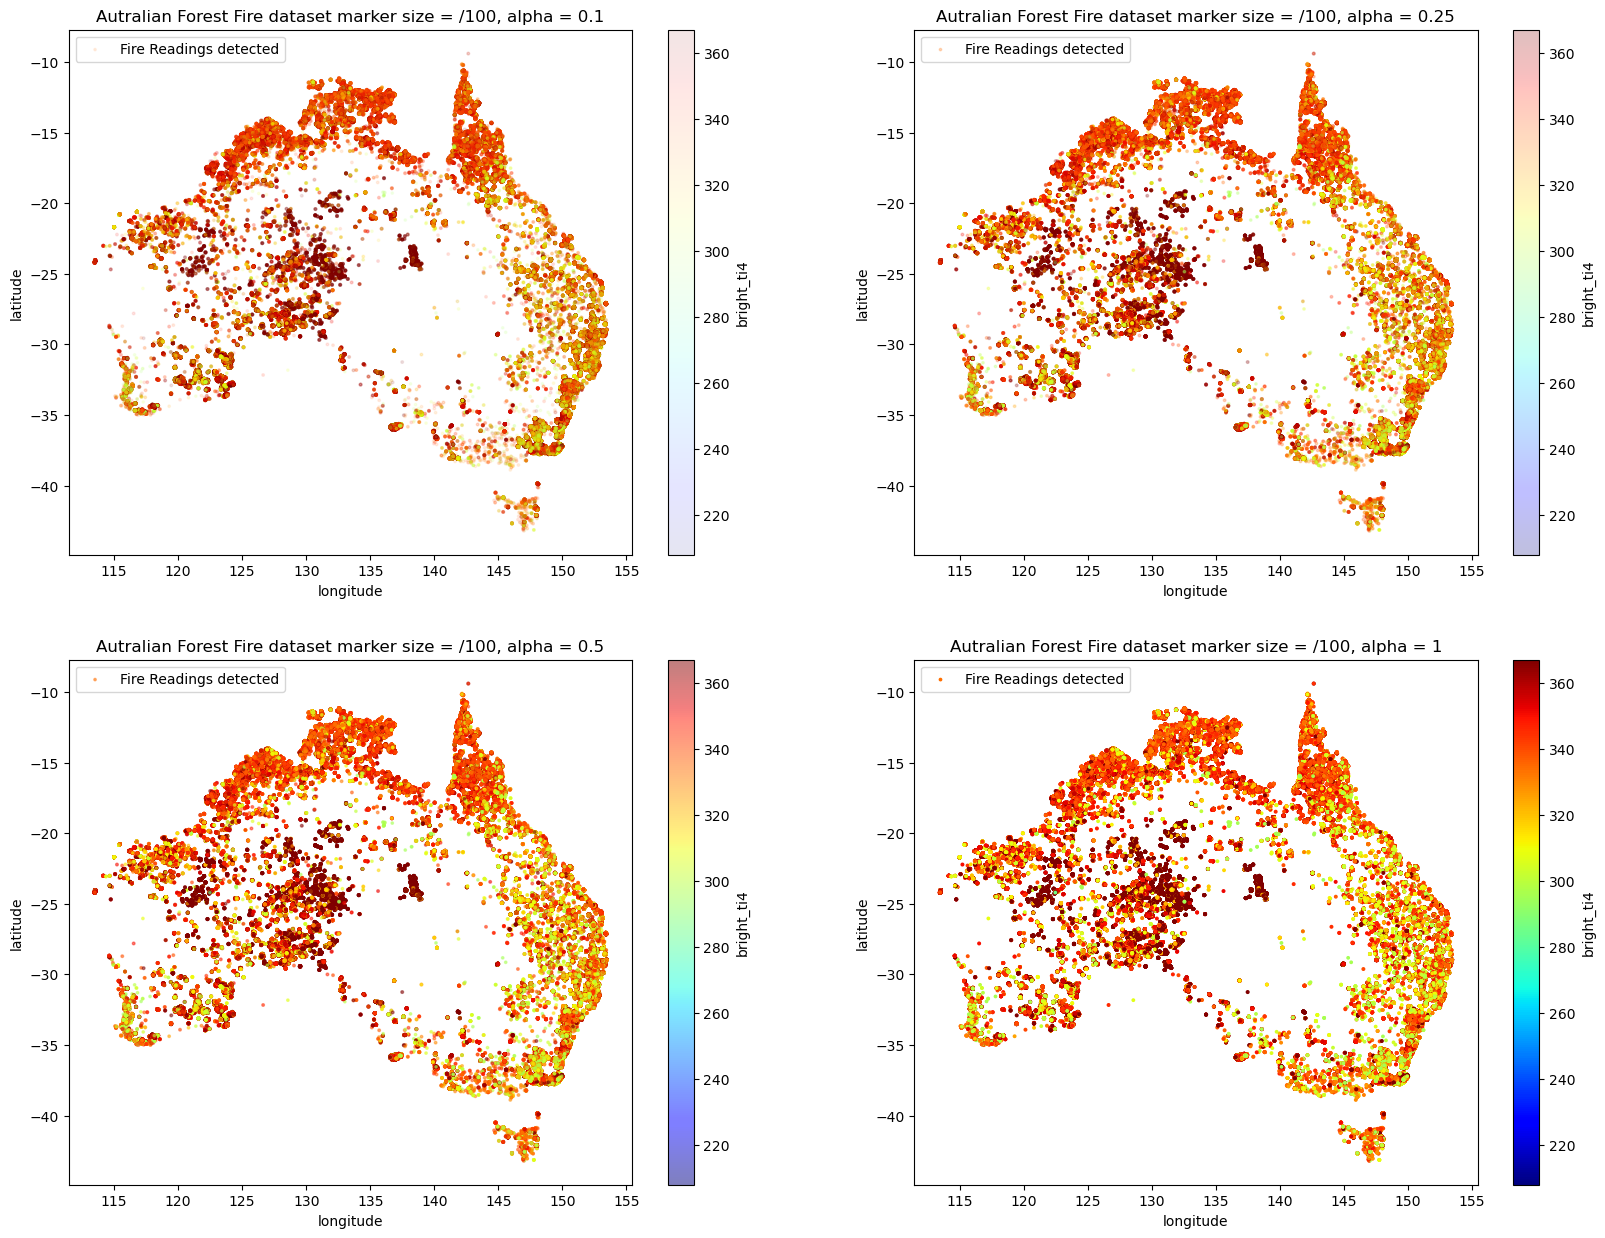

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(20,15))

AusFireDataSet.plot(ax = ax[0,0],kind="scatter", x="longitude", y="latitude", alpha= 0.1,
                    s = AusFireDataSet['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,0].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.1')
AusFireDataSet.plot(ax = ax[0,1],kind="scatter", x="longitude", y="latitude", alpha= 0.25,
                    s = AusFireDataSet['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,1].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.25')
AusFireDataSet.plot(ax = ax[1,0],kind="scatter", x="longitude", y="latitude", alpha= 0.5,
                    s = AusFireDataSet['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,0].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.5')
AusFireDataSet.plot(ax = ax[1,1],kind="scatter", x="longitude", y="latitude", alpha= 1,
                    s = AusFireDataSet['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,1].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 1')
plt.legend()

### From the above plots we can see that the alpha value of around 0.5 allow for better representation of density vs intensity for the brightness feature for the given datapoints

### The plot seems still somewhat congested, now to make the inference more telligible we will try to subsample our dataset by taking different sampling percentage of our original data

In [ ]:
AusFireDataSet_75pSample=AusFireDataSet.sample(int(AusFireDataSet.shape[0]*0.75), random_state = 1)
AusFireDataSet_50pSample=AusFireDataSet.sample(int(AusFireDataSet.shape[0]*0.50), random_state = 1)
AusFireDataSet_25pSample=AusFireDataSet.sample(int(AusFireDataSet.shape[0]*0.25), random_state = 1)
AusFireDataSet_10pSample=AusFireDataSet.sample(int(AusFireDataSet.shape[0]*0.10), random_state = 1)
AusFireDataSet_5pSample=AusFireDataSet.sample(int(AusFireDataSet.shape[0]*0.05), random_state = 1)
AusFireDataSet_1pSample=AusFireDataSet.sample(int(AusFireDataSet.shape[0]*0.01), random_state = 1)

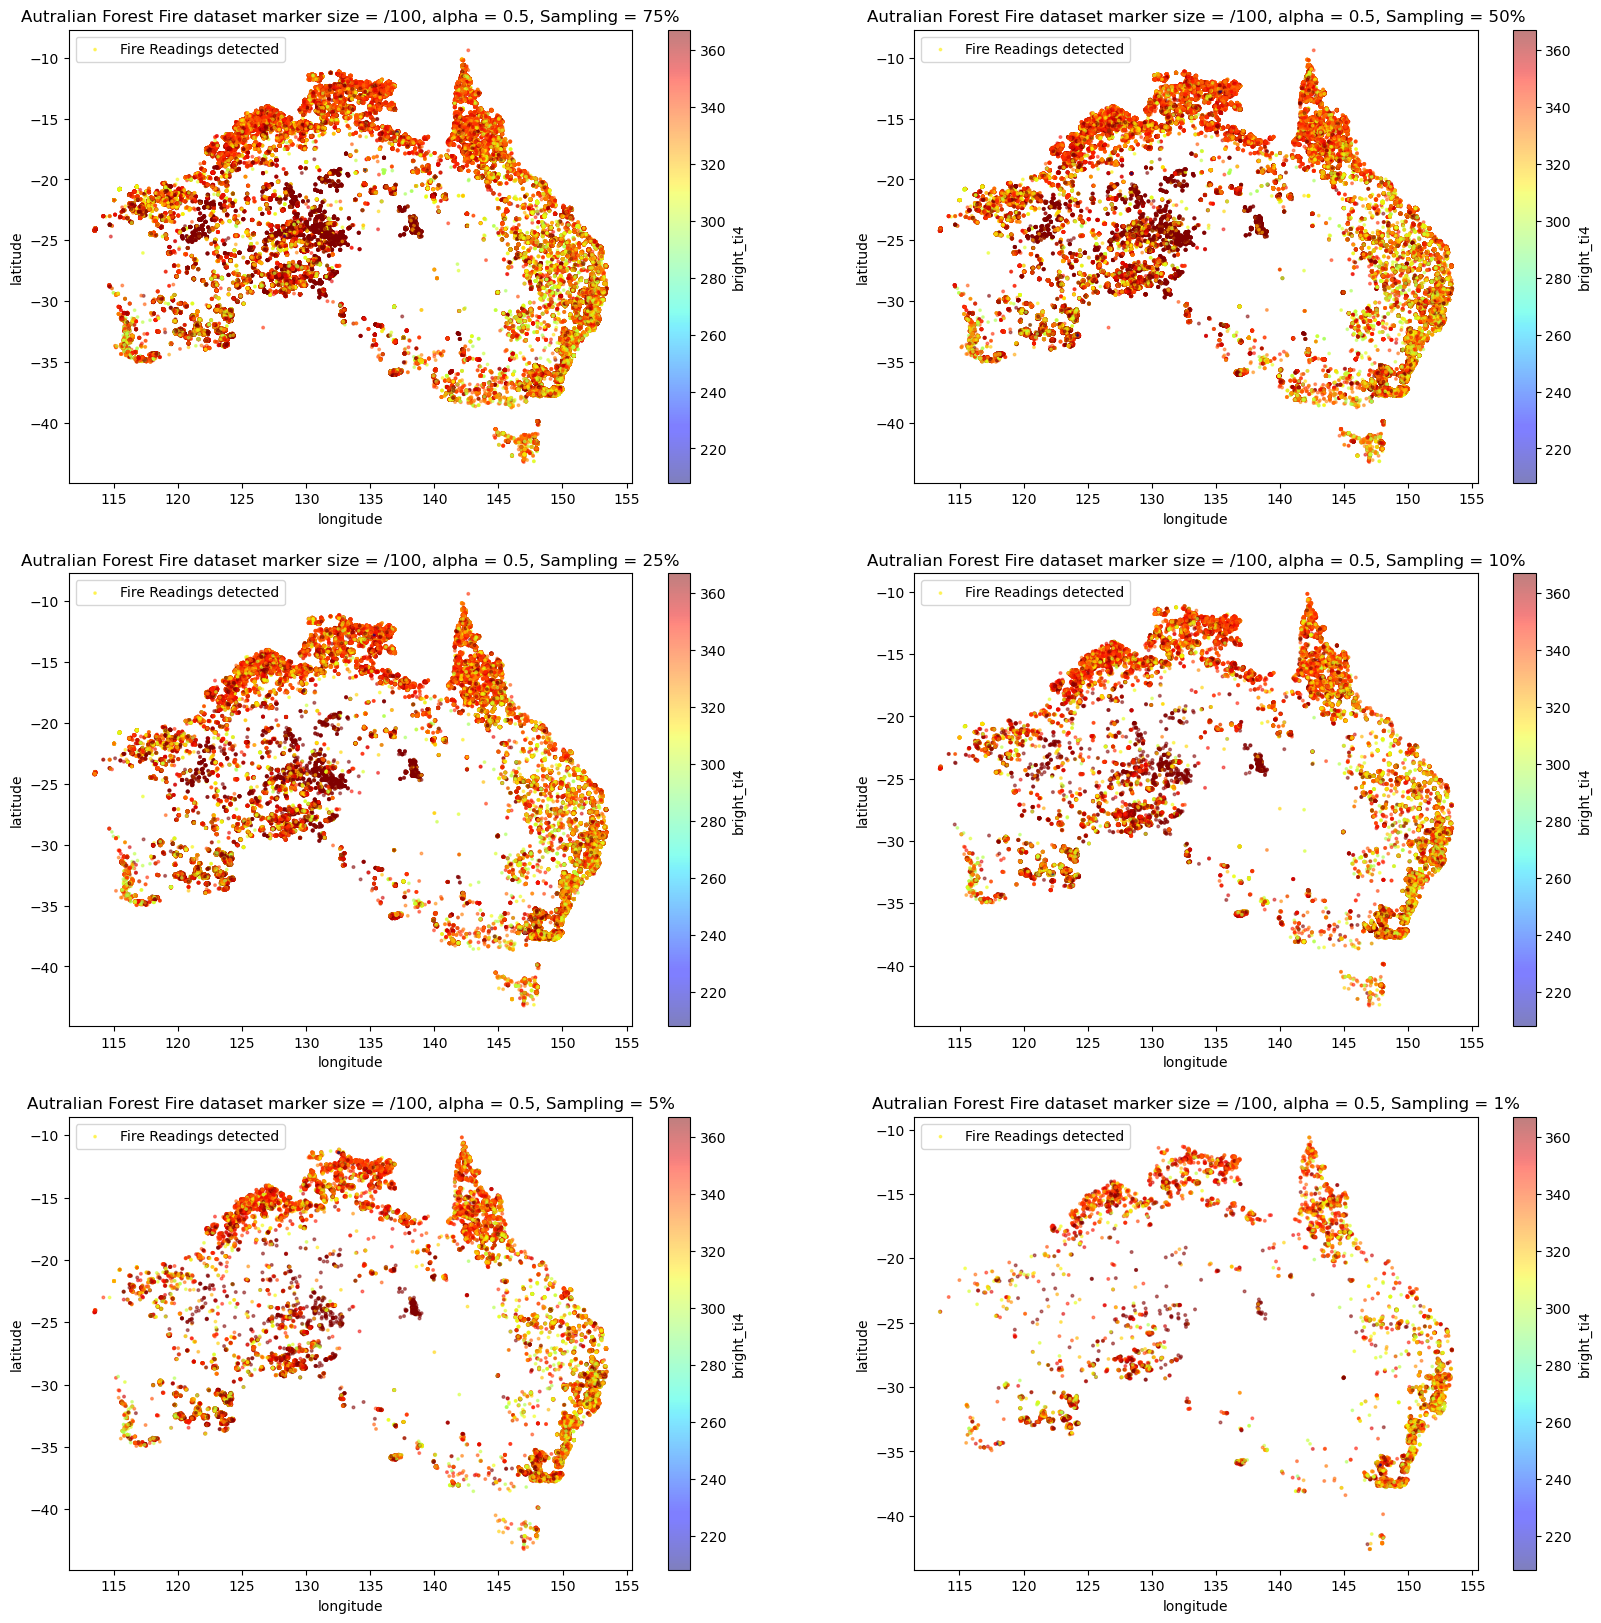

In [ ]:
fig,ax = plt.subplots(3,2, figsize=(20,20))

AusFireDataSet_75pSample.plot(ax = ax[0,0],kind="scatter", x="longitude", y="latitude", alpha= 0.5,
                    s = AusFireDataSet_75pSample['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,0].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.5, Sampling = 75%')
AusFireDataSet_50pSample.plot(ax = ax[0,1],kind="scatter", x="longitude", y="latitude", alpha= 0.5,
                    s = AusFireDataSet_50pSample['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,1].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.5, Sampling = 50%')
AusFireDataSet_25pSample.plot(ax = ax[1,0],kind="scatter", x="longitude", y="latitude", alpha= 0.5,
                    s = AusFireDataSet_25pSample['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,0].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.5, Sampling = 25%')
AusFireDataSet_10pSample.plot(ax = ax[1,1],kind="scatter", x="longitude", y="latitude", alpha= 0.5,
                    s = AusFireDataSet_10pSample['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,1].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.5, Sampling = 10%')
AusFireDataSet_5pSample.plot(ax = ax[2,0],kind="scatter", x="longitude", y="latitude", alpha= 0.5,
                    s = AusFireDataSet_5pSample['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[2,0].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.5, Sampling = 5%')
AusFireDataSet_1pSample.plot(ax = ax[2,1],kind="scatter", x="longitude", y="latitude", alpha= 0.5,
                    s = AusFireDataSet_1pSample['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)
ax[2,1].set_title('Autralian Forest Fire dataset marker size = /100, alpha = 0.5, Sampling = 1%')

plt.legend()

### From the above graph, we infere that for a good visual reprensentation of the data set we shoud select sampling percentages between 25 to 10 percent for a balance between sample density and diversity in brightness intensity so we are choosing 25% as a good sampling rate

## Final Scatter plot

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

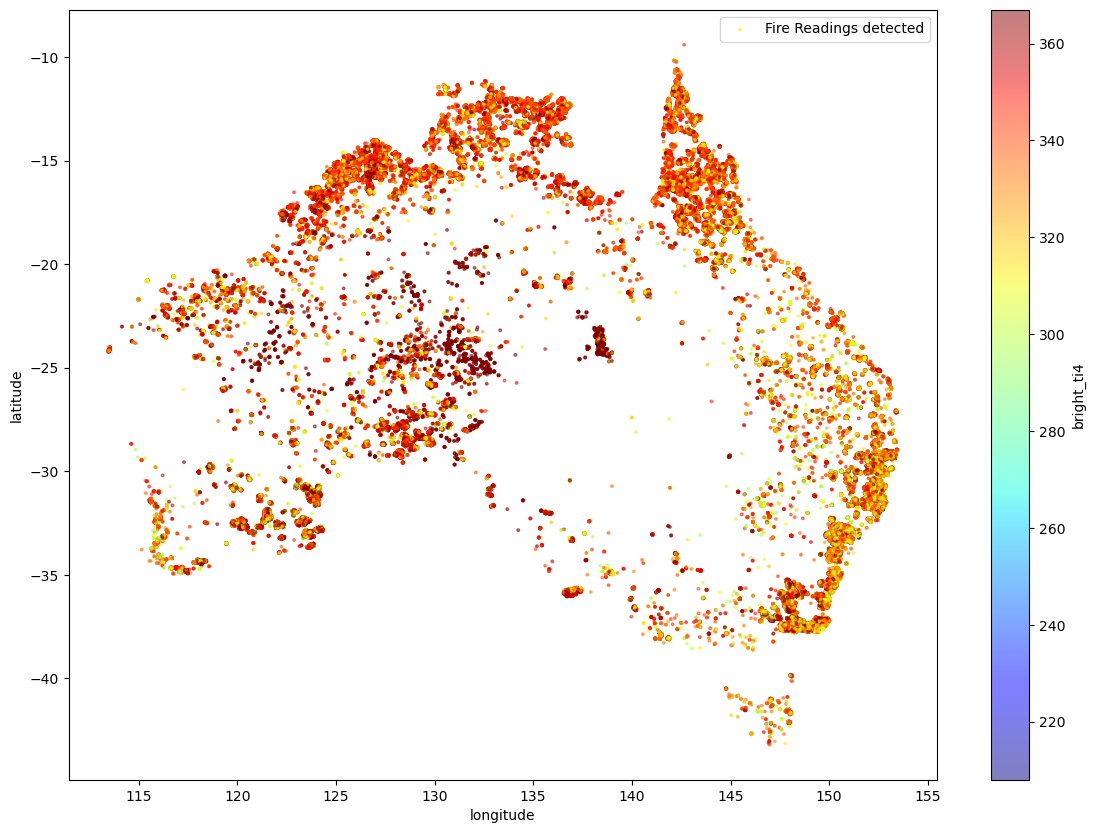

In [ ]:
AusFireDataSet_25pSample.plot(kind="scatter", x="longitude", y="latitude", alpha= 0.5, figsize=(14,10),
                    s = AusFireDataSet_25pSample['bright_ti4']/100, label="Fire Readings detected",
                    c="bright_ti4", cmap=plt.get_cmap("jet"), colorbar=True)

## Hexbin plotting for the dataset wit different grid size values

Text(0.5, 1.0, 'Autralian Forest Fire dataset with gridsize 150')

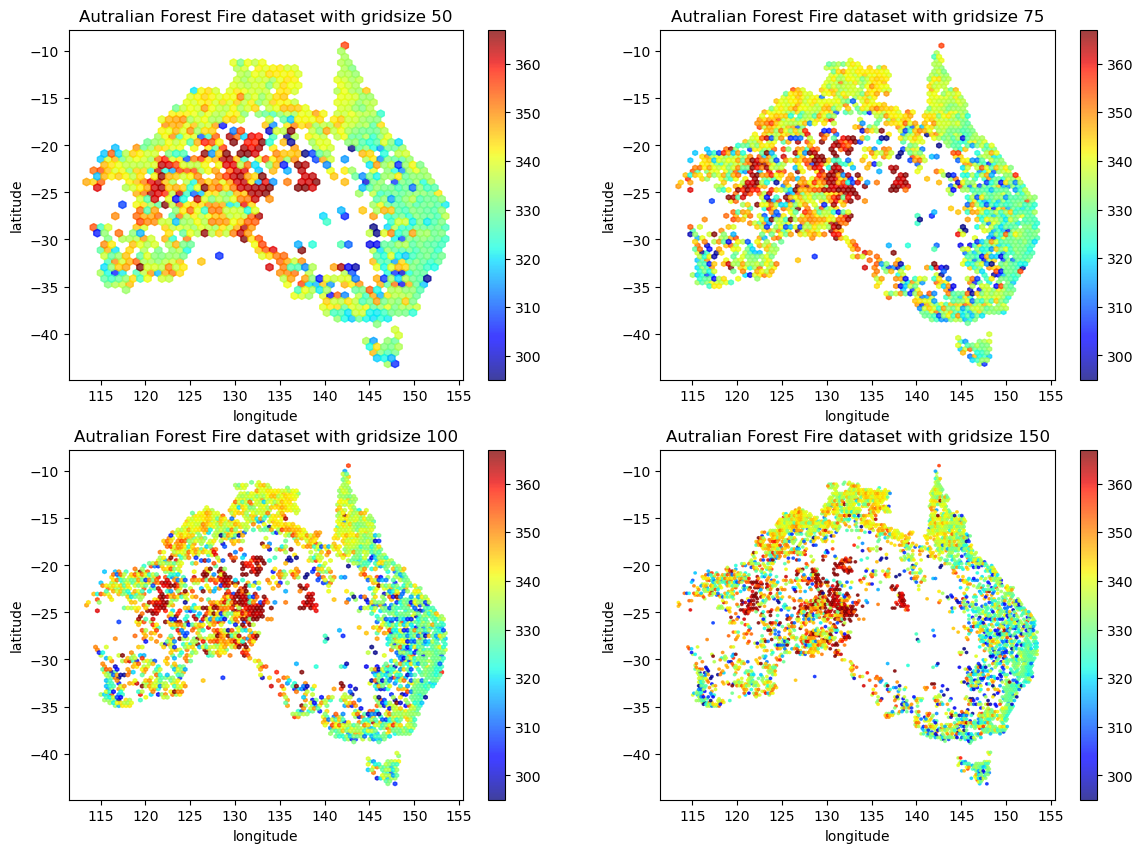

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(20,20))

AusFireDataSet.plot(ax = ax[0,0],kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (50), alpha= 0.75, figsize=(14,10),
                     label="Fire Readings detected" , cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,0].set_title('Autralian Forest Fire dataset with gridsize 50')
AusFireDataSet.plot(ax = ax[0,1],kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (75), alpha= 0.75, figsize=(14,10),
                     label="Fire Readings detected" , cmap=plt.get_cmap("jet"), colorbar=True)
ax[0,1].set_title('Autralian Forest Fire dataset with gridsize 75')
AusFireDataSet.plot(ax = ax[1,0],kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (100), alpha= 0.75, figsize=(14,10),
                     label="Fire Readings detected" , cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,0].set_title('Autralian Forest Fire dataset with gridsize 100')
AusFireDataSet.plot(ax = ax[1,1],kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (150), alpha= 0.75, figsize=(14,10),
                     label="Fire Readings detected" , cmap=plt.get_cmap("jet"), colorbar=True)
ax[1,1].set_title('Autralian Forest Fire dataset with gridsize 150')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

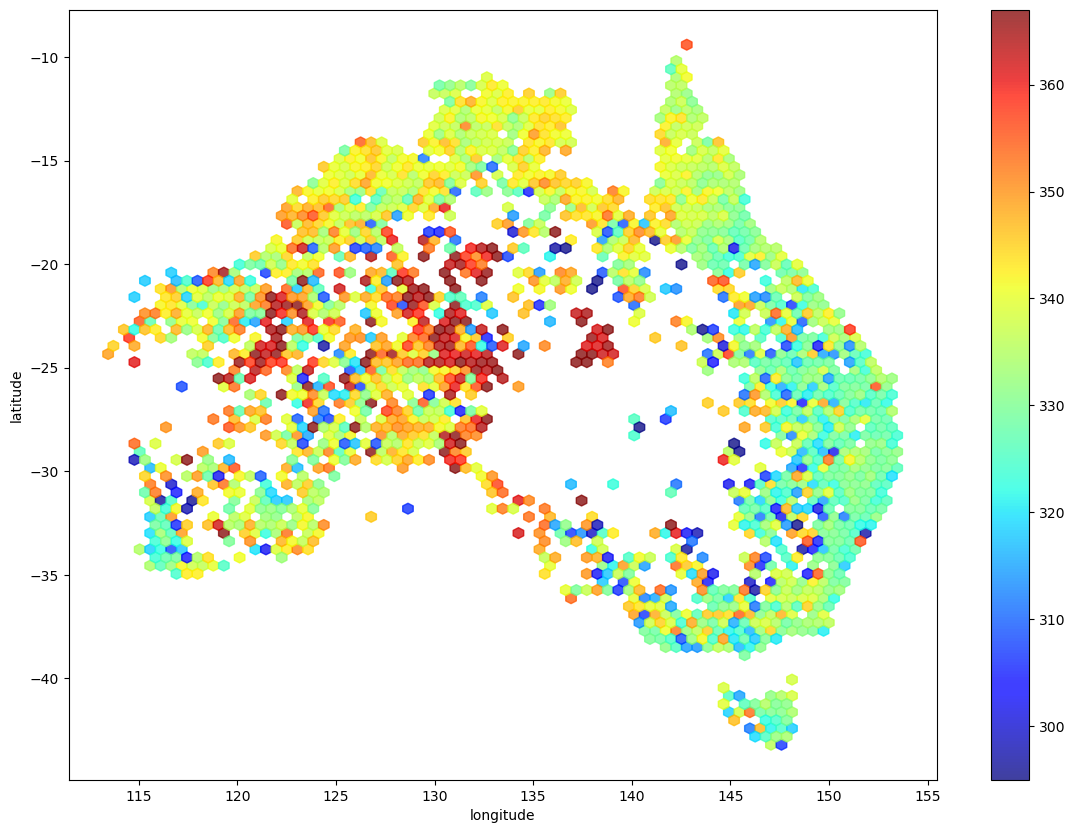

In [ ]:
AusFireDataSet.plot(kind="hexbin", x="longitude", y="latitude",C = "bright_ti4", gridsize = (75), alpha= 0.75, figsize=(14,10),
                     label="Fire Readings detected" , cmap=plt.get_cmap("jet"), colorbar=True)